### Metric visualization

In [1]:
from sklearn.preprocessing import normalize
from collections import namedtuple
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import pickle
import calendar
import time
import numpy as np
from pathlib import Path as p
from matplotlib.backends.backend_pdf import PdfPages

In [2]:
# Create a namedtuple class
Result = namedtuple('Result', ['confusion_matrix', 'accuracy', 'model'])


def metric_to_pdf(model_path: list, y: np.array, sampling_fraction: float):
    # Load model result, sort, and save the confusion matrix to pdf for visualization

    def metric_processing(model_path) -> list:
        # Load the results
        with open(model_path, 'rb') as f:
            results = pickle.load(f)
        results = [Result(normalize(result[0]), result[1], result[2]) for result in results]
        # Sort in terms of accuracy
        results = sorted(results, key=lambda x: x[1], reverse=True)
        return results

    def visualize(metric_list, y):
        # Save the confusion matrix to pdf file in the form of heatmap
        median_index = len(metric_list) // 2
        # Save to a pdf file
        conf = pd.DataFrame(metric_list[median_index].confusion_matrix, columns=y.unique(), index=y.unique())
        conf.index.name = 'Actual'
        conf.columns.name = 'Predicted'
        title = f"{', '.join(model for model in metric_list[median_index].model.named_estimators_)}.\nAccuracy : {metric_list[median_index].accuracy:.2f}.\ndata_set_sample: {round(sampling_fraction * 100)}%"
        # Name of pdf file is the current time in terms of second
        pdffig = PdfPages(f"{calendar.timegm(time.gmtime())}.pdf")
        ax = plt.axes()
        ax.set_title(title)
        sb.heatmap(conf, annot=True)
        plt.savefig(pdffig, format="pdf")
        pdffig.close()

    metric_list = metric_processing(model_path)
    visualize(metric_list, y)

### Voting classifier

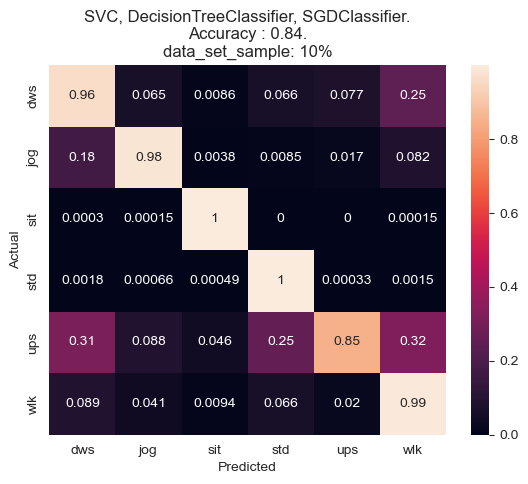

In [3]:
data_path = "D:\BitBucket/5280\Project\Data\Engineered"
sampling_fraction = 0.1
df = pd.read_parquet(p(data_path) / 'combined_df_no_hw.parquet')
# Stratified sampling
df = df.groupby('target', group_keys=False).apply(lambda x: x.sample(frac=sampling_fraction))
y = df['target']
voting_classification = 'D:\BitBucket/5280\Project\Voting Classification/voting_classification_result.pkl'
metric_to_pdf(model_path=voting_classification, y=y, sampling_fraction=sampling_fraction)